In [1]:
import random

import networkx as nx
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
def gen_ring_graph(number_nodes, k):
    g = nx.Graph()
    for i in range(number_nodes):
        g.add_node(i)
    return g

In [3]:
def get_k_near_neighbours(G, node, k):
    neighbours = []
    nodes = G.nodes()
    neighbour_left = (node - k) % len(nodes)
    neighbour_right = (node + k) % len(nodes) + 1
    
    #handle edge cases
    #overflow to the right
    if neighbour_right < neighbour_left:
        neighbours = list(G.nodes)[neighbour_left:]
        addList = list(G.nodes)[:neighbour_right]
        neighbours.extend(addList)
        
    #overflow to the left
    elif neighbour_left > node + len(nodes) - k - 1:
        neighbours = list(G.nodes)[:neighbour_right]
        addlist = list(G.nodes)[neighbour_left:]
        neighbours.extend(addlist)
    
    else:
        neighbours = list(G.nodes)[neighbour_left : neighbour_right]
    
    return neighbours

In [4]:
def gen_ring_graph(number_nodes, k):
    G = nx.Graph()
    for i in range(number_nodes):
        G.add_node(i)       
    
    for i in range(number_nodes):    
        neighbours = get_k_near_neighbours(G, i, k)
        for u,v in combinations(neighbours,2):
            if u == v:
                continue
            if u == i:
                G.add_edge(u,v)

    return G

In [5]:
# source: https://stackoverflow.com/q/64603777
def gen_ring_graph_V2(number_nodes, k):
    G = nx.Graph()
    for i in range(number_nodes):
      sources = [i] * k
      targets = range(i + 1, i + k + 1)
      targets = [node % number_nodes for node in targets]
      G.add_edges_from(zip(sources, targets))
        
    return G

In [6]:
g = gen_ring_graph(10,2)
g2 = gen_ring_graph_V2(10,2)

In [7]:
def get_pathlength(G, i, j):
    return nx.shortest_path_length(G,i,j)

In [8]:
print(get_pathlength(g, 9,4))

3


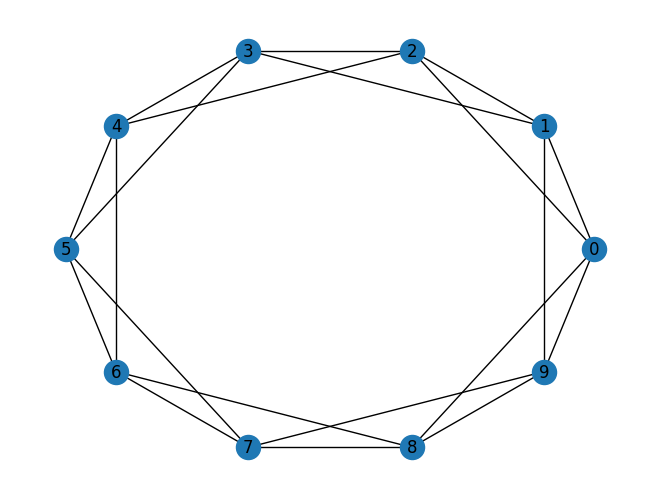

In [9]:
nx.draw_circular(g, with_labels=True)

In [10]:
def rewire_edges(G, p):
    edges = G.edges()
    nodes = G.nodes()
    
    for edge in edges:
        if random.uniform(0,1) < p:
            edge_beginn = edge[0]
            edge_old_end = edge[1]
            G.remove_edge(edge[0], edge[1])
            edge_new_end = random.choice([j for j in nodes if j not in [edge_beginn, edge_old_end]])
            
            G.add_edge(edge_beginn, edge_new_end)
            edges = g.edges()
            continue
            
        
                
    return G

In [11]:
g_rewired = rewire_edges(g,0.9)

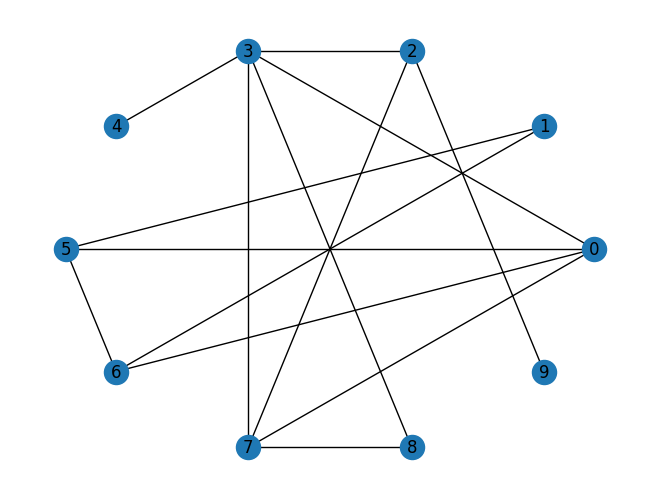

In [12]:
nx.draw_circular(g_rewired, with_labels=True)

In [13]:
def calculate_degree(g):
    degrees = g.degree()
    degree_sum = 0
    for degree in degrees:
        degree_sum+=degree[1]
    return  degree_sum/len(g.nodes())

In [14]:
def generate_graphs(count):
    p = []
    degree = []
    for i in range(count):
        num_nodes = 10
        
        p.append(random.uniform(0,1))
        g = gen_ring_graph(num_nodes, 2)
        g_rewired = rewire_edges(g,  p[i])
        degree.append(calculate_degree(g_rewired))
        
    fig, ax = plt.subplots()
    ax.scatter(p, degree)
    plt.show()

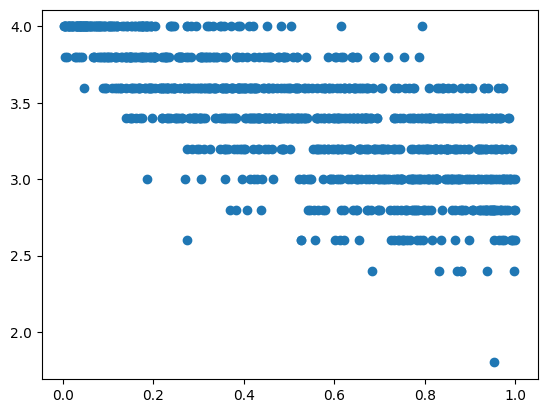

In [15]:
generate_graphs(1000)

In [16]:
def cu(g, node, neighbourhod):
    if neighbourhod < 2:
        return None
    nodes = g.nodes()
    edges = g.edges()
    neighbours = get_k_near_neighbours(g, node, neighbourhod)
    max_edges = (len(nodes) * (len(nodes) - 1))/2
    
    real_neighbours = 0
    for u,v in combinations(neighbours,2):
        if [u,v] in edges:
            real_neighbours+=1
    
    return real_neighbours/max_edges

In [17]:
def avg_cu(g, neighbourhood):
    sumcu = 0
    for node in g.nodes():
        if cu(g, node, neighbourhood) is None:
            continue
            
        sumcu += cu(g, node, neighbourhood)
    
    return sumcu/len(g.nodes())

In [18]:
print(avg_cu(g_rewired, 2))

0.055555555555555546


In [19]:
print(avg_cu(gen_ring_graph(10,2),2))

0.15555555555555553


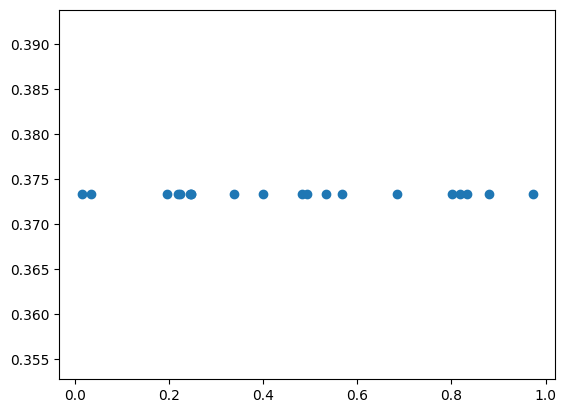

In [21]:
p = []
avg = []
for i in range(20):
    p_new = random.uniform(0,1)
    p.append(p_new)
    g_rewired = rewire_edges(gen_ring_graph(1000, 10), p_new)
    avg.append(avg_cu(g, 10))
    
fig, ax = plt.subplots()
ax.scatter(p, avg)
plt.show()